In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


In [124]:
pwd

'/home/royal/Downloads'

In [359]:
train=pd.read_csv('train (2).csv')
test2=pd.read_csv('test (1).csv')
test=pd.read_csv('test (1).csv')

In [203]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [371]:

train.drop(['PassengerId','Cabin',],axis=1,inplace=True)



In [372]:
test.drop(['PassengerId','Cabin'],axis=1,inplace=True)


ValueError: labels ['PassengerId' 'Cabin'] not contained in axis

In [373]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,0,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,3,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,1,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,3,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,1,S,1


In [374]:
test.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,IsAlone
0,3,"Kelly, Mr. James",male,34.5,330911,0,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,0,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,240276,1,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,315154,1,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,1,S,0


In [375]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Ticket        0
Fare          0
Embarked      2
IsAlone       0
dtype: int64

In [376]:
test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
Ticket       0
Fare         0
Embarked     0
IsAlone      0
dtype: int64

In [377]:
import re
te=[]
for i in train['Name']:
    
    te.append(re.findall(r"\w+\.",i))


In [378]:
import re
le=[]
for i in test['Name']:
    
    le.append(re.findall(r"\w+\.",i))


In [379]:
np.where(train['Age'].isnull())

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [380]:
np.where(test['Age'].isnull())

(array([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
         84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
        132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
        199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
        256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
        292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
        380, 382, 384, 408, 410, 413, 416, 417]),)

In [381]:
null_age_index=[ 5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]

In [382]:
test_null_age=[ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
         84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
        132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
        199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
        256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
        292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
        380, 382, 384, 408, 410, 413, 416, 417]

In [383]:
import random
from random import randint

newages=[]
for i in range(len(null_age_index)):
#     print(i[0])
    if 'Mr.' or 'Mrs.' in te[null_age_index[i]]:
        newages.append(random.randint(20,35))
                             
    elif 'Master.' or 'Miss.' in te[null_age_index[i]]:
        newages.append(random.randint(10,18))


In [384]:
import random
from random import randint

testages=[]
for i in range(len(test_null_age)):
#     print(i[0])
    if 'Mr.' or 'Mrs.' in le[test_null_age[i]]:
        testages.append(random.randint(20,35))
                             
    elif 'Master.' or 'Miss.' in le[test_null_age[i]]:
        testages.append(random.randint(10,18))


In [385]:
for i in range(len(newages)):
    train['Age'][null_age_index.pop()]=newages[i]


/home/royal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [386]:
for i in range(len(test_null_age)):
    test['Age'][test_null_age.pop()]=testages[i]

    

/home/royal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [387]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [388]:
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [389]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,0,S,0
1,1,1,female,38.0,3,C,0
2,1,3,female,26.0,1,S,1
3,1,1,female,35.0,3,S,0
4,0,3,male,35.0,1,S,1


In [390]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,male,34.5,0,Q,1
1,3,female,47.0,0,S,0
2,2,male,62.0,1,Q,1
3,3,male,27.0,1,S,1
4,3,female,22.0,1,S,0


In [391]:
train['Age'].describe()

count    891.000000
mean      29.279652
std       13.168567
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [392]:
train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

KeyError: "['Parch'] not in index"

In [71]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [74]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


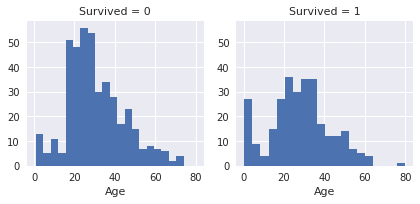

In [76]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

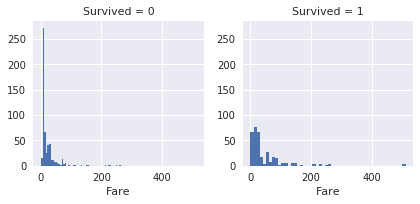

In [95]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=50)

In [393]:
train['Embarked'].mode()

0    S
dtype: object

In [394]:
test['Embarked'].mode()

0    S
dtype: object

In [395]:
train['Embarked'].fillna('S',inplace=True)

In [396]:
test['Embarked'].fillna('S',inplace=True)

In [397]:
train.Embarked.isna().any()

False

In [519]:
x=np.array(train.drop(['Survived','Embarked'],axis=1))


In [520]:
test_x=np.array(test.drop(['Embarked'],axis=1))


In [521]:
test_x

array([[3, 'male', 34.5, 0, 1],
       [3, 'female', 47.0, 0, 0],
       [2, 'male', 62.0, 1, 1],
       ...,
       [3, 'male', 38.5, 0, 1],
       [3, 'male', 22.0, 1, 1],
       [3, 'male', 35.0, 2, 0]], dtype=object)

In [522]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
#Encodes the Categorical values into numerical values
x[:,1] = labelencoder_X.fit_transform(x[:,1])#selecting the column 
onehotencoder = OneHotEncoder(categorical_features= [1])#onehot encoder
x= onehotencoder.fit_transform(x).toarray()

# Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

In [523]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
#Encodes the Categorical values into numerical values
test_x[:,1] = labelencoder_X.fit_transform(test_x[:,1])#selecting the column 
onehotencoder = OneHotEncoder(categorical_features= [1])#onehot encoder
test_x= onehotencoder.fit_transform(test_x).toarray()

# Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

In [524]:
x.shape

(891, 6)

In [525]:
test_x.shape

(418, 6)

In [526]:
emb=np.array(train.iloc[:,6])

In [527]:
emb_x=np.array(test.iloc[:,5])

In [528]:
emb=emb.reshape(-1,1)

In [529]:
emb_x=emb_x.reshape(-1,1)

In [530]:
x=np.append(arr=x,values=emb,axis=1)

In [531]:
test_x=np.append(arr=test_x,values=emb_x,axis=1)

In [532]:

test_x.shape,x.shape

((418, 7), (891, 7))

In [533]:
labelencoder_emb = LabelEncoder()
#Encodes the Categorical values into numerical values
x[:,6] = labelencoder_X.fit_transform(x[:,6])#selecting the column 
onehotencoder = OneHotEncoder(categorical_features= [6])#onehot encoder
x= onehotencoder.fit_transform(x).toarray()


In [534]:
labelencoder_emb = LabelEncoder()
#Encodes the Categorical values into numerical values
test_x[:,6] = labelencoder_X.fit_transform(test_x[:,6])#selecting the column 
onehotencoder = OneHotEncoder(categorical_features= [6])#onehot encoder
test_x= onehotencoder.fit_transform(test_x).toarray()

In [535]:
x.shape,test_x.shape

((891, 8), (418, 8))

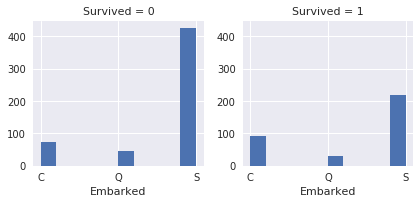

In [536]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Embarked')

In [557]:
x=x[:,:-1]

In [558]:
test_x=test_x[:,:-1]

In [559]:
y = np.array(train["Survived"])
test_x.shape,x.shape

((418, 6), (891, 6))

In [560]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2)

In [561]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [568]:
random_forest = svm.SVC()
random_forest.fit(x_tr, y_tr)
# from xgboost import XGBClassifier
# clf=XGBClassifier(learning_rate=0.001,n_estimators=1000,n_jobs=1)
# clf.fit(x_tr,y_tr)
random_forest.score(x_tr, y_tr)

NameError: name 'svm' is not defined

In [563]:
ytes=random_forest.predict(x_te)
# ytes=clf.predict(x_te)

In [564]:
count=0
acc=0
for i in range(len(ytes)):
    if ytes[i]==y_te[i]:
        acc+=1
    count+=1    
'acc',acc/count  
# ytes=np.array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
#        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
#        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
#        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
#        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
#        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
#        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
#        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
#        1, 0, 0])

('acc', 0.8156424581005587)

In [565]:
# yp=ytes.reshape(-1,1)
y2=random_forest.predict(test_x)
passenger=test2['PassengerId']
# ytes.shape

In [566]:
submission = pd.DataFrame({
        "PassengerId": passenger,
        "Survived": y2
    })



In [567]:
ypred==y2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False,

In [468]:
submission.to_csv('kaglecom.csv', sep=',',index=False)


In [360]:

combine=[train,test]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [361]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [362]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [363]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [364]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,3,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,1,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,3,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,1,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,330877,1,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,3,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,2,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,1,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,2,NaN,C,0
